In [1]:
import pandas as pd

In [7]:
personas = pd.read_csv("personass_2011.csv", sep = ";")

In [6]:
conicet = pd.read_csv("ref_categoria_conicet.csv", sep = ";")

In [8]:
personas.head()

,persona_id,anio,sexo_id,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,...,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,seniority_level,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
0,1,2011,2,36,-1,-1,-1,64,4,0,...,1,1,4488,,-1.0,-1.0,3.0,116.0,22.0,1.0
1,5,2011,1,48,1,255,255,255,3,5,...,13,17,118,B,2.0,3.0,3.0,118.0,19.0,2.0
2,7,2011,2,30,5,111,111,158,1,11,...,13,13,587,D,NaN,NaN,NaN,NaN,NaN,NaN
3,10,2011,2,51,5,248,248,29,4,0,...,3,4,44,,-1.0,4.0,3.0,124.0,21.0,1.0
4,11,2011,1,39,2,223,203,280,3,8,...,15,18,7310,C,-1.0,4.0,3.0,6627.0,20.0,1.0


In [9]:
pers = personas[["persona_id", "anio", "categoria_conicet_id"]]
#Le paso una lista solo con las columnas que quiero incluir

In [10]:
pers.head()

,persona_id,anio,categoria_conicet_id
0,1,2011,-1.0
1,5,2011,2.0
2,7,2011,NaN
3,10,2011,-1.0
4,11,2011,-1.0


In [11]:
pd.merge(pers, conicet,how="right", on = "categoria_conicet_id")
# Merge: Junta tablas en base a algún criterio. 
# Right: Toma en cuenta la tabla de la derecha, es decir que no pierda ningún dato cuando las unimos.
# Usamos una columna de igual nombre en las dos tablas, y cuando las juntamos se superpone. SIEMPRE se pierden datos

,persona_id,anio,categoria_conicet_id,categoria_conicet_descripcion
0,1.0,2011.0,-1.0,No pertenece a Conicet
1,10.0,2011.0,-1.0,No pertenece a Conicet
2,11.0,2011.0,-1.0,No pertenece a Conicet
3,12.0,2011.0,-1.0,No pertenece a Conicet
4,13.0,2011.0,-1.0,No pertenece a Conicet
...,...,...,...,...
48638,79131.0,2011.0,11.0,Otro personal Conicet
48639,85209.0,2011.0,11.0,Otro personal Conicet
48640,146747.0,2011.0,11.0,Otro personal Conicet
48641,NaN,NaN,12.0,Investigador correspondiente


In [15]:
pd.merge(pers, conicet,how="left", on = "categoria_conicet_id")

,persona_id,anio,categoria_conicet_id,categoria_conicet_descripcion
0,1,2011,-1.0,No pertenece a Conicet
1,5,2011,2.0,Investigador adjunto
2,7,2011,NaN,NaN
3,10,2011,-1.0,No pertenece a Conicet
4,11,2011,-1.0,No pertenece a Conicet
...,...,...,...,...
68547,185558,2011,NaN,NaN
68548,185574,2011,NaN,NaN
68549,185583,2011,NaN,NaN
68550,185590,2011,NaN,NaN


In [ ]:
# Outer: no es la intersección sino todo.
# Inner: solo toma datos que exiten -> 

In [16]:
pd.merge(pers, conicet,how="outer", on = "categoria_conicet_id")

,persona_id,anio,categoria_conicet_id,categoria_conicet_descripcion
0,1.0,2011.0,-1.0,No pertenece a Conicet
1,10.0,2011.0,-1.0,No pertenece a Conicet
2,11.0,2011.0,-1.0,No pertenece a Conicet
3,12.0,2011.0,-1.0,No pertenece a Conicet
4,13.0,2011.0,-1.0,No pertenece a Conicet
...,...,...,...,...
68550,146747.0,2011.0,11.0,Otro personal Conicet
68551,47272.0,2011.0,10.0,Pasante
68552,NaN,NaN,9.0,Gestión CyT
68553,NaN,NaN,12.0,Investigador correspondiente


In [ ]:
#Saber de que es la tabla con describe
# Cuantos NaN tiene
# Info de cada columna
# El tipo de columna

# ¿Qué hago con los NaN? Depende.
# Puedo cambiarlos por la media de esa columna.
# ¿Cuando puedo reemplazar por la media? -> cuando hay distribución normal si no no, o no es recomendable.
# Si no se la distribución de los datos, no va a ser la media real.
# Se pueden eliminar, en una tabla de muchas filas si la cantidad de NaN no es relevante. 
# Depende de la cantidad de datos y del tipo de dato que estoy buscando.
# Drop Nan


In [17]:
pd.merge(pers, conicet,how="inner", on = "categoria_conicet_id")

,persona_id,anio,categoria_conicet_id,categoria_conicet_descripcion
0,1,2011,-1.0,No pertenece a Conicet
1,10,2011,-1.0,No pertenece a Conicet
2,11,2011,-1.0,No pertenece a Conicet
3,12,2011,-1.0,No pertenece a Conicet
4,13,2011,-1.0,No pertenece a Conicet
...,...,...,...,...
48635,60260,2011,11.0,Otro personal Conicet
48636,79131,2011,11.0,Otro personal Conicet
48637,85209,2011,11.0,Otro personal Conicet
48638,146747,2011,11.0,Otro personal Conicet


In [19]:
personas.describe()

,persona_id,anio,sexo_id,edad,maximo_grado_academico_id,disciplina_maximo_grado_academico_id,disciplina_titulo_grado_id,disciplina_experticia_id,tipo_personal_id,producciones_ult_anio,producciones_ult_2_anios,producciones_ult_3_anios,producciones_ult_4_anios,institucion_trabajo_id,categoria_conicet_id,categoria_incentivos,max_dedicacion_horaria_docente_id,institucion_cargo_docente_id,clase_cargo_docente_id,tipo_condicion_docente_id
count,68552.000000,68552.0,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,68552.000000,48640.000000,48640.000000,48640.000000,48640.000000,48640.000000,48640.000000
mean,52537.987280,2011.0,1.423430,38.475172,3.306847,152.966726,132.484304,170.716361,2.757513,1.828524,3.428200,4.866598,6.097269,3542.855949,0.148109,1.568113,2.284581,2420.716509,26.990933,1.530222
std,40279.541919,0.0,0.494106,12.483655,2.258145,112.218458,111.126032,96.854644,1.007493,3.373484,5.835939,8.044310,10.063260,3537.429358,2.434280,2.481388,0.836581,2876.320797,15.466552,0.674031
min,1.000000,2011.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,2.000000,17.000000,-1.000000
25%,22112.500000,2011.0,1.000000,29.000000,1.000000,26.000000,3.000000,62.000000,2.000000,0.000000,0.000000,0.000000,0.000000,473.000000,-1.000000,-1.000000,2.000000,366.000000,18.000000,1.000000
50%,44284.500000,2011.0,1.000000,37.000000,3.000000,199.000000,150.000000,202.000000,3.000000,0.000000,1.000000,2.000000,2.000000,1734.000000,-1.000000,2.000000,3.000000,691.000000,20.000000,1.000000
75%,73350.250000,2011.0,2.000000,48.000000,5.000000,254.000000,248.000000,252.000000,4.000000,3.000000,5.000000,7.000000,8.000000,6355.000000,-1.000000,4.000000,3.000000,4067.000000,22.000000,2.000000
max,185608.000000,2011.0,2.000000,88.000000,8.000000,288.000000,288.000000,288.000000,4.000000,78.000000,130.000000,154.000000,216.000000,17131.000000,11.000000,5.000000,3.000000,16601.000000,81.000000,3.000000


In [20]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68552 entries, 0 to 68551
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   persona_id                            68552 non-null  int64  
 1   anio                                  68552 non-null  int64  
 2   sexo_id                               68552 non-null  int64  
 3   edad                                  68552 non-null  int64  
 4   maximo_grado_academico_id             68552 non-null  int64  
 5   disciplina_maximo_grado_academico_id  68552 non-null  int64  
 6   disciplina_titulo_grado_id            68552 non-null  int64  
 7   disciplina_experticia_id              68552 non-null  int64  
 8   tipo_personal_id                      68552 non-null  int64  
 9   producciones_ult_anio                 68552 non-null  int64  
 10  producciones_ult_2_anios              68552 non-null  int64  
 11  producciones_ul

In [ ]:
# ¿Cómo se si la distribución es normal? Si la media y la mediana es la misma (aprox)
# ¿Cuánto es la aproximación considerable para ser normal? Hay bibliotecas de Python que permiten calcularlo.
# Con los datos que quiero conocer tomo la columna relevante para ver si es normal.

<AxesSubplot:xlabel='edad', ylabel='Count'>

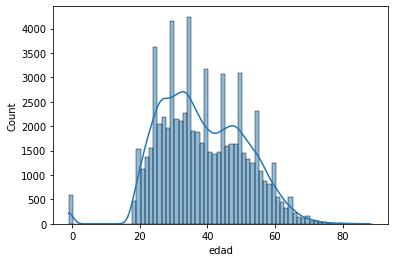

In [26]:
import seaborn as sns
g = sns.histplot(data = personas, x = "edad", binwidth=1.25, kde = True)
g
#Data = nombre del df. X= nombre de la columna
# Conclusión: No es normal :)

In [ ]:
# Cuantiles: como dividir una distribución. 
# Outlier: datos que se alejan de la distribución. 
# P-value: valor estadístico que nos dice la probabilidad de que ocurra cierto suceso con cierta confianza (nivel de certeza)
# Test de normalidad: PYTHON test de shapiro, valor de p mayor a 0.05 -> la distribución es normal
"""
w, p  = stats.shapiro(altura)
"""

<AxesSubplot:>

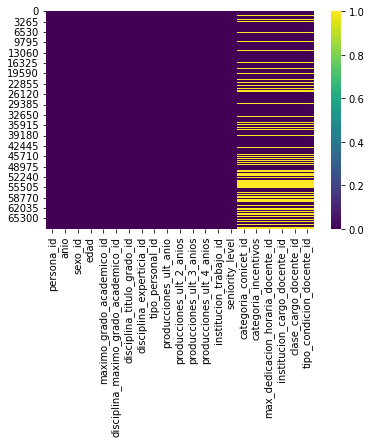

In [27]:
import seaborn as sns

sns.heatmap(personas.isnull(), cmap='viridis')

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(personas)

ValueError: could not convert string to float: ''